In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
V=[0.0141,0.0158,0.0158,0.0171,0.0152,0.0151,0.0171,0.0146,0.0146,0.0146]
sini=[0.114,0.1,0.114,0.128,0.093,0.086,0.120,0.107,0.114,0.114]
sino=[0.176,0.223,0.190,0.209,0.190,0.141,0.190,0.190,0.183,0.209]
ri=[1.6,1.4,1.6,1.8,1.3,1.2,1.7,1.5,1.6,1.6]
ro=[2.5,3.2,2.7,3.0,2.7,2.0,2.7,2.7,2.6,3.0]
Verr=[]
Sierr=[]
Soerr=[]
ndata=len(V)
lavg=[4.5,5.1,4.8,5.2,4.5,3.6,4.8,4.7,4.6,5.0]
lerr=[]
for i in range(0,len(V)):
    ri[i]=0.001*ri[i]
    ro[i]=0.001*ro[i]
    sini[i]=sini[i]/2
    sino[i]=sino[i]/2
for i in range(0,len(V)):
    Verr.append(50*(V[i]**3))
    lerr.append(0.2)
for i in range (0,len(V)):
    Sierr.append(np.sqrt((0.5*np.cos(0.5*np.arctan(ri[i]/0.014))/(1+(ri[i]/0.014)**2)*0.0001/0.014)**2+(0.5*np.cos(0.5*np.arctan(ri[i]/0.014))/(1+(ri[i]/0.014)**2)*(ri[i]*0.0003/0.000196))**2))
    Soerr.append(np.sqrt((0.5*np.cos(0.5*np.arctan(ro[i]/0.014))/(1+(ro[i]/0.014)**2)*0.0001/0.014)**2+(0.5*np.cos(0.5*np.arctan(ro[i]/0.014))/(1+(ro[i]/0.014)**2)*(ro[i]*0.0003/0.000196))**2))
#print(Verr)
#print(sini)
print(sino)
print(Sierr)
print(Soerr)




[0.088, 0.1115, 0.095, 0.1045, 0.095, 0.0705, 0.095, 0.095, 0.0915, 0.1045]
[0.003720802657336292, 0.0036871800387138945, 0.003720802657336292, 0.003757948790362103, 0.003671782626935892, 0.003657374406899505, 0.003738954406305678, 0.0037035320719748855, 0.003720802657336292, 0.003720802657336292]
[0.003911106935238723, 0.004089469248100083, 0.003960114249143092, 0.0040367558312670295, 0.003960114249143092, 0.003798306705499631, 0.003960114249143092, 0.003960114249143092, 0.003935374598992309, 0.0040367558312670295]


In [3]:
V  =  array( 'f', V)
sini  =  array( 'f', sini)
sino = array('f', sino)
Verr= array('f',Verr)
Sierr=array('f',Sierr)
Soerr=array('f',Soerr)
lerr=array('f',lerr)
lavg=array('f',lavg)

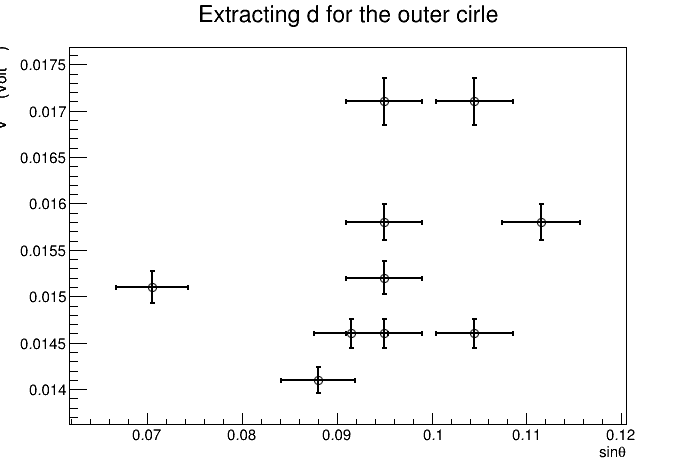

In [4]:
c1 = TCanvas( 'c1', '..', 200, 10, 700, 500 )
             
mygraph = TGraphErrors(ndata,sino,V,Soerr,Verr)
mygraph.Draw("AP")
mygraph.SetTitle("Extracting d for the outer cirle")
mygraph.SetLineColor( 1 )
mygraph.SetLineWidth( 2 )
mygraph.SetMarkerColor( 1 )
mygraph.SetMarkerStyle( 4 )

mygraph.GetXaxis().SetTitle( 'sin#theta' )
mygraph.GetYaxis().SetTitle( 'V^{-1/2} (Volt^{-1/2})')
c1.Draw()

 FCN=62.9625 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=1.58447e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -5.54708e-03   6.32816e-03   1.10503e-06  -8.15419e-01
   2  p1           2.21124e-01   6.68828e-02   1.16752e-05  -6.93988e-02


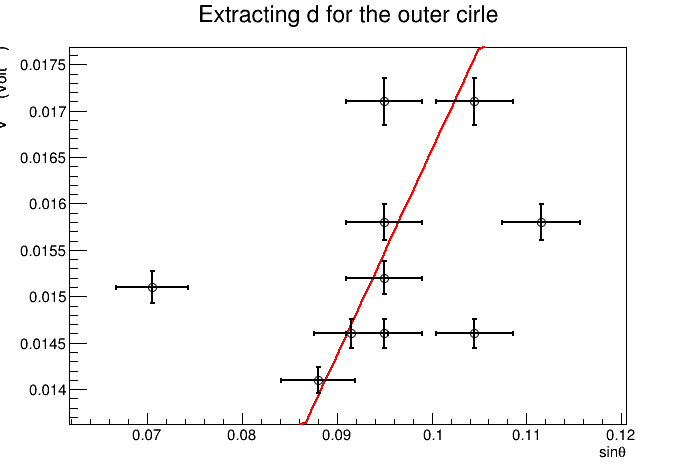

In [5]:
l1=TF1('l1','pol1')
mygraph.Fit(l1,'','')
c1.Draw()

In [6]:
lamb=[]
errlamb=[]
for i in range(0,len(V)):
    lamb.append(2*0.213*sini[i])
    errlamb.append(2*0.213*Sierr[i])
for i in range(0,len(V)):
    lamb.append(2*0.123*sino[i])
    errlamb.append(2*0.123*Soerr[i])
print(lamb)
print(errlamb)
    

[0.02428200001269579, 0.02130000031739473, 0.02428200001269579, 0.027264001294970513, 0.019809000469744206, 0.018318000622093676, 0.02555999942868948, 0.02279100016504526, 0.02428200001269579, 0.02428200001269579, 0.021647999882698058, 0.027429000601172447, 0.023369999706745147, 0.025707000777125358, 0.023369999706745147, 0.017343000322580338, 0.023369999706745147, 0.023369999706745147, 0.022508999794721603, 0.025707000777125358]
[0.001585061958990991, 0.0015707387281581758, 0.001585061958990991, 0.0016008861693553626, 0.0015641793692484497, 0.0015580414510332047, 0.0015927945873700081, 0.0015777046498842537, 0.001585061958990991, 0.001585061958990991, 0.0009621322844177485, 0.0010060093961656094, 0.00097418815176934, 0.0009930419186130167, 0.00097418815176934, 0.0009343834449537098, 0.00097418815176934, 0.00097418815176934, 0.000968102197162807, 0.0009930419186130167]


In [7]:
sig=[0.1112,0.25]
l1=[49,43,49,55,40,37,51,46,49,49]
l2=[43,55,47,51,47,35,47,47,45,51]
weig=[]
sw=[]
for i in range(0,len(l1)):
    weig.append((l1[i]*sig[0]+l2[i]*sig[1])/(sig[0]+sig[1]))
    sw.append(np.sqrt(1/(sig[0]+sig[1])))
print(weig)
print(sw)

[44.84717607973422, 51.30564784053157, 47.61572535991141, 52.23145071982282, 44.844961240310084, 35.61572535991141, 48.23145071982282, 46.6921373200443, 46.23145071982281, 50.38427464008859]
[1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045, 1.6638958140993045]
